In [36]:
#Import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

# Reading the data

In [38]:
data = pd.read_csv(r"C:\Users\Dr. J .R Junghare\Downloads\world-happiness-report-2021.csv")

In [39]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


#  Taking only those columns which will be useful for analysis

In [40]:
data_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [41]:
data = data[data_columns].copy()

In [42]:
happy_df = data.rename({'Country name':'country_name', 'Regional indicator' : 'regional_indicator', 
                        'Ladder score' : 'happiness_score', 'Logged GDP per capita' : 'logged_gdp_per_capita', 
                        'Social support' : 'social_support', 'Healthy life expectancy' : 'healthy_life_expectancy', 
                        'Freedom to make life choices' : 'freedom_to_make_life_choices', 'Generosity' : 'generosity', 
                        'Perceptions of corruption' : 'perceptions_of_corruption' }, axis = 1)

In [43]:
happy_df.head()

,country_name,regional_indicator,happiness_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


#  Check whether any columns has null values

In [44]:
happy_df.isnull().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
logged_gdp_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

# Plot between Happiness and GDP

Text(0, 0.5, 'GDP per capita')

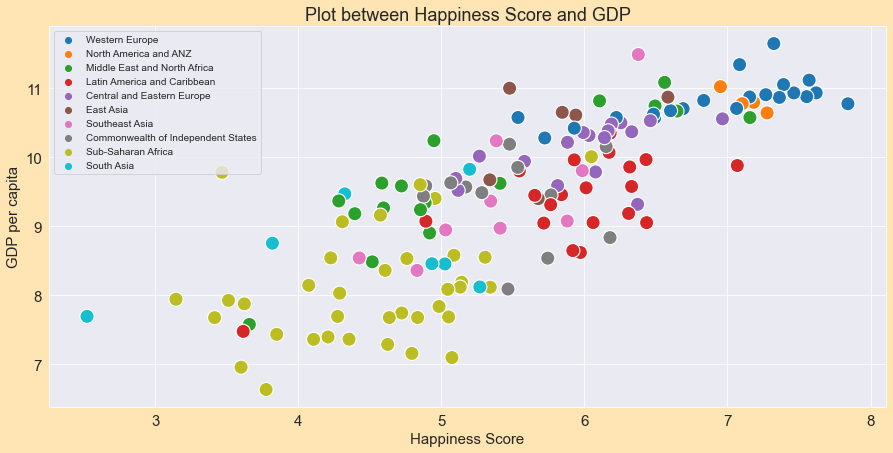

In [45]:
# Plot between happiness and GDP

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.logged_gdp_per_capita, hue = happy_df.regional_indicator, s = 200);

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

#  GDP by Region

In [14]:
gdp_region = happy_df.groupby('regional_indicator')['logged_gdp_per_capita'].sum()
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_gdp_per_capita, dtype: float64

Text(0, 0.5, '')

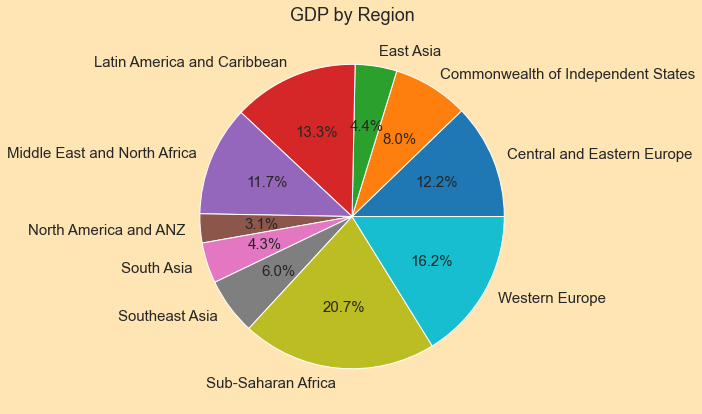

In [15]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

# Total Countries in each Region

In [16]:
# Total countries

total_country = happy_df.groupby('regional_indicator')[['country_name']].count()
print(total_country)

                                    country_name
regional_indicator                              
Central and Eastern Europe                    17
Commonwealth of Independent States            12
East Asia                                      6
Latin America and Caribbean                   20
Middle East and North Africa                  17
North America and ANZ                          4
South Asia                                     7
Southeast Asia                                 9
Sub-Saharan Africa                            36
Western Europe                                21


#  Average corruption in each region

In [18]:
# corruption in regions

corruption = happy_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
corruption

,perceptions_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

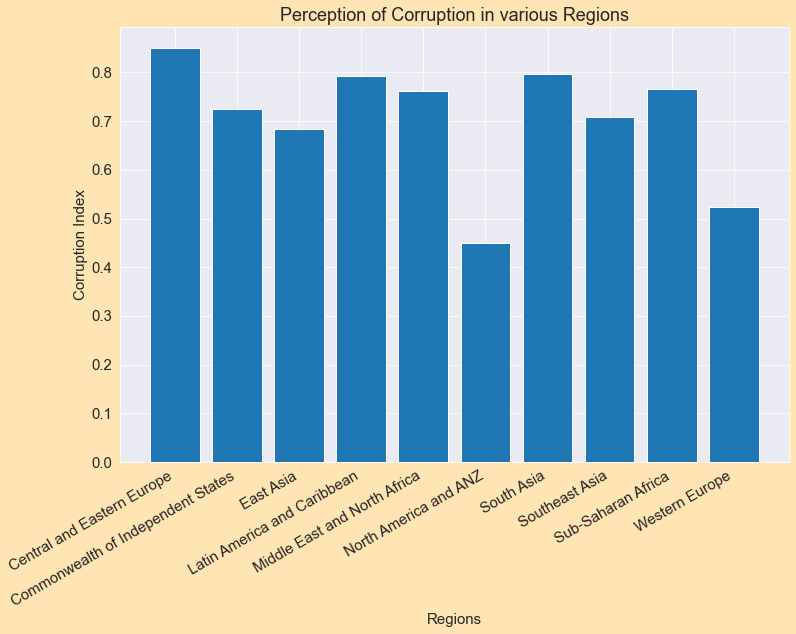

In [27]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.title('Perception of Corruption in various Regions')
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Corruption Index', fontsize = 15)
plt.xticks(rotation = 30, ha ='right')
plt.bar(corruption.index, corruption.perceptions_of_corruption)

# Looking at top and least 10 happy countries

In [19]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

C:\Users\DRJ~1.RJU\AppData\Local\Temp/ipykernel_11404/3770038285.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation = 45, ha = 'right')
C:\Users\DRJ~1.RJU\AppData\Local\Temp/ipykernel_11404/3770038285.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels, rotation = 45, ha = 'right')


Text(599.1068181818181, 0.5, 'Life expectancy')

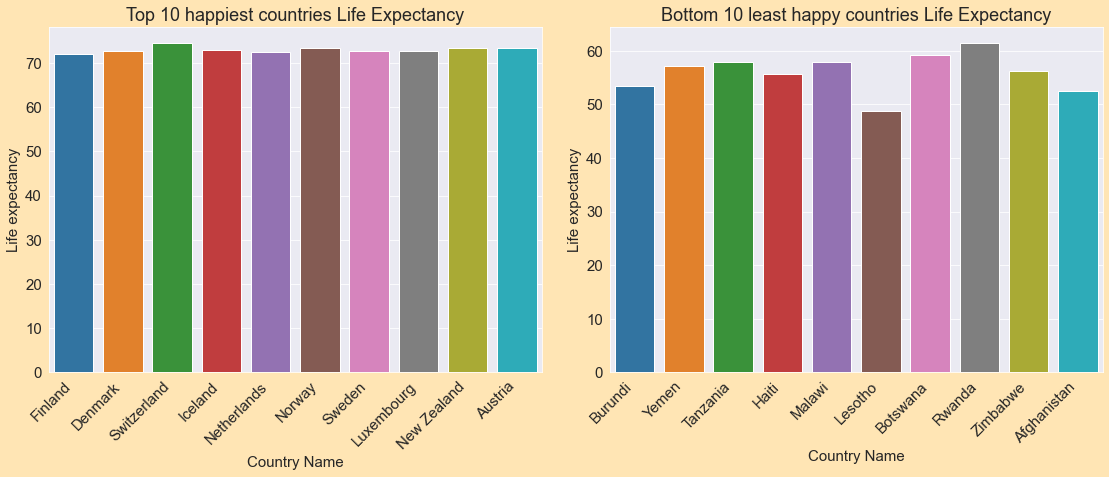

In [20]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
xlabels = top_10.country_name
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].set_xticklabels(xlabels, rotation = 45, ha = 'right')
sns.barplot(x = top_10.country_name, y = top_10.healthy_life_expectancy, ax = axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life expectancy')


xlabels = bottom_10.country_name
axes[1].set_title('Bottom 10 least happy countries Life Expectancy')
axes[1].set_xticklabels(xlabels, rotation = 45, ha = 'right')
sns.barplot(x = bottom_10.country_name, y = bottom_10.healthy_life_expectancy, ax = axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life expectancy')


#  Plot between Freedom to make choices  and Happiness score

Text(0, 0.5, 'Happiness Score')

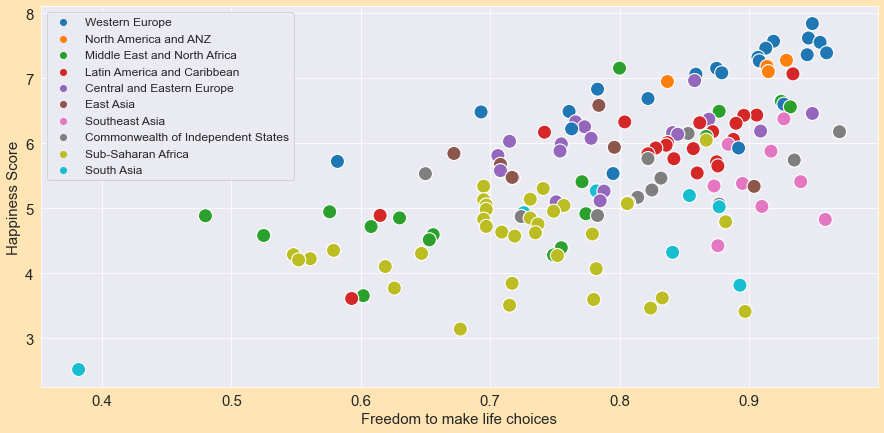

In [21]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(x = happy_df.freedom_to_make_life_choices, y =happy_df.happiness_score, hue = happy_df.regional_indicator, 
                s = 200)
plt.legend(loc ='upper left', fontsize = '12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')

# Least corrupted  top 10 countries

<BarContainer object of 10 artists>

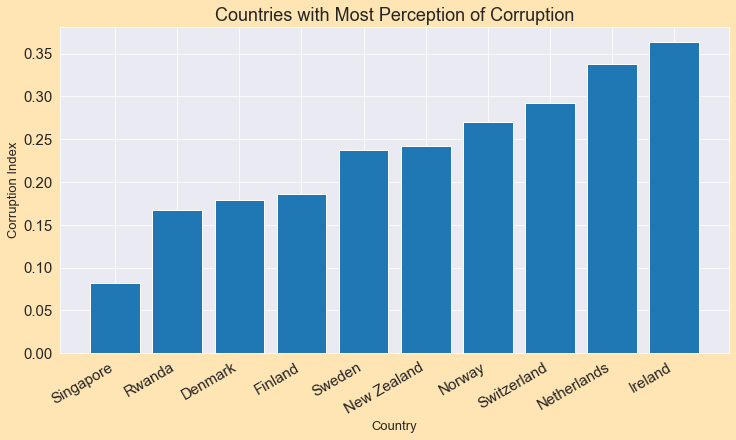

In [22]:
country = happy_df.sort_values(by = 'perceptions_of_corruption').head(10)
plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Countries with Most Perception of Corruption')
plt.xlabel('Country', fontsize =13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(country.country_name, country.perceptions_of_corruption)

#  Most corrupted 10 countries

<BarContainer object of 10 artists>

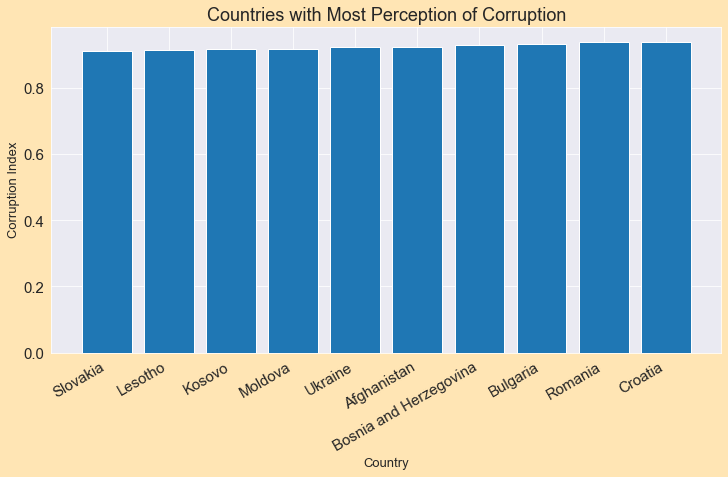

In [23]:
country = happy_df.sort_values(by = 'perceptions_of_corruption').tail(10)
plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Countries with Most Perception of Corruption')
plt.xlabel('Country', fontsize =13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(country.country_name, country.perceptions_of_corruption)

# Plot between corruption and happiness

Text(0, 0.5, 'Corruption')

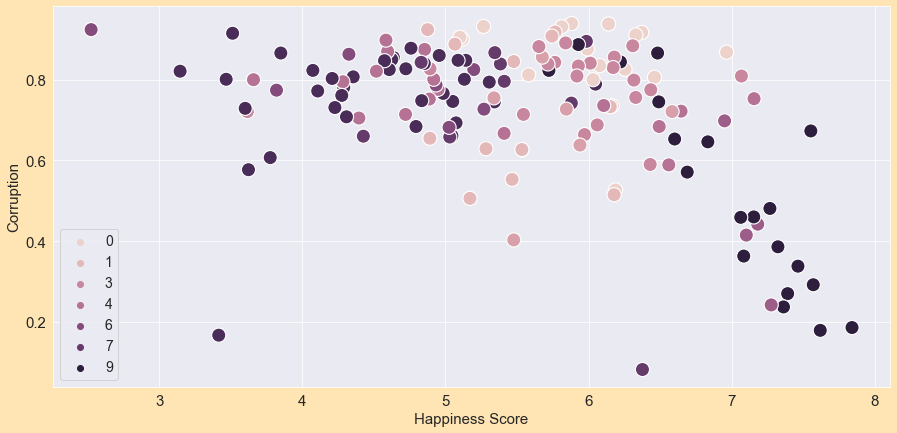

In [49]:
 #corruption vs happiness

plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.perceptions_of_corruption, hue = happy_df.regional_indicator,
                s = 200)
plt.legend(loc = 'lower left', fontsize = '14')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')

#  Correlation between numeric features

In [25]:
happy_df.corr()

,happiness_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
happiness_score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
logged_gdp_per_capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
social_support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
healthy_life_expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
freedom_to_make_life_choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
perceptions_of_corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


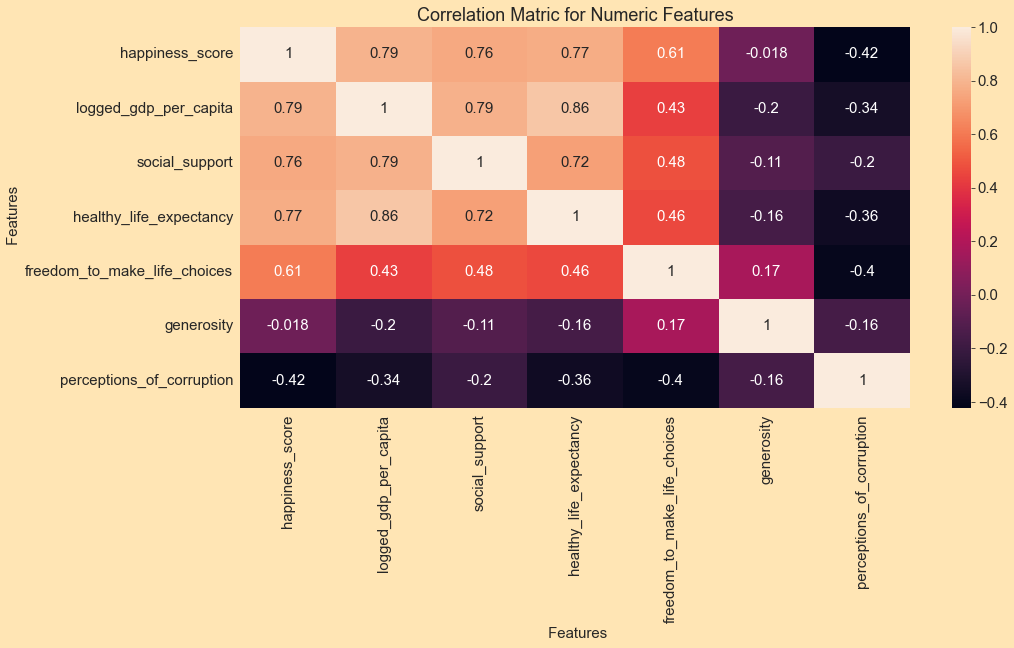

In [26]:
happiness_matrix = happy_df.corr(method = 'pearson')

sns.heatmap(happiness_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel(' Features')

plt.ylabel(' Features')

plt.show()

#  Numerizing the object type features

In [46]:
df_numerized = happy_df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,country_name,regional_indicator,happiness_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,40,9,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,33,9,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,128,9,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,54,9,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,96,9,7.464,10.932,0.942,72.400,0.913,0.175,0.338
5,103,9,7.392,11.053,0.954,73.300,0.960,0.093,0.270
6,127,9,7.363,10.867,0.934,72.700,0.945,0.086,0.237
7,78,9,7.324,11.647,0.908,72.600,0.907,-0.034,0.386
8,97,5,7.277,10.643,0.948,73.400,0.929,0.134,0.242
9,6,9,7.268,10.906,0.934,73.300,0.908,0.042,0.481


# Correlation between all features

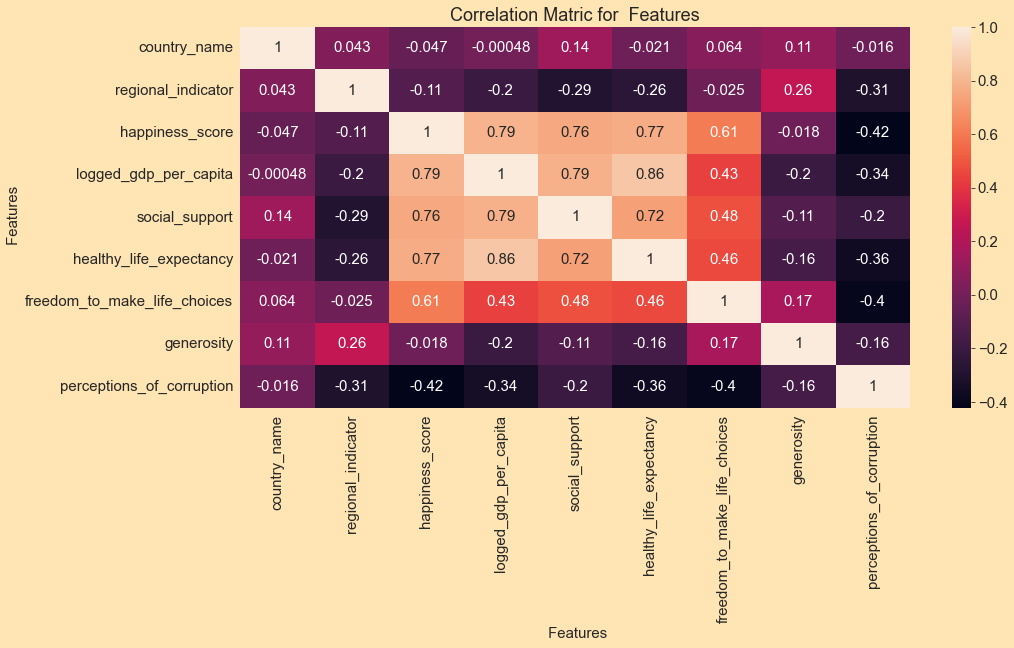

In [28]:
happiness_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(happiness_matrix, annot = True)

plt.title('Correlation Matric for  Features')

plt.xlabel(' Features')

plt.ylabel(' Features')

plt.show()

In [29]:
df_numerized.corr()

,country_name,regional_indicator,happiness_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
country_name,1.000000,0.042865,-0.047239,-0.000482,0.143808,-0.021241,0.064435,0.110932,-0.016134
regional_indicator,0.042865,1.000000,-0.111532,-0.202772,-0.289510,-0.259251,-0.025069,0.256924,-0.306184
happiness_score,-0.047239,-0.111532,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
logged_gdp_per_capita,-0.000482,-0.202772,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
social_support,0.143808,-0.289510,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
healthy_life_expectancy,-0.021241,-0.259251,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
freedom_to_make_life_choices,0.064435,-0.025069,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
generosity,0.110932,0.256924,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
perceptions_of_corruption,-0.016134,-0.306184,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


In [47]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

country_name                  country_name                    1.000000
                              regional_indicator              0.042865
                              happiness_score                -0.047239
                              logged_gdp_per_capita          -0.000482
                              social_support                  0.143808
                              healthy_life_expectancy        -0.021241
                              freedom_to_make_life_choices    0.064435
                              generosity                      0.110932
                              perceptions_of_corruption      -0.016134
regional_indicator            country_name                    0.042865
                              regional_indicator              1.000000
                              happiness_score                -0.111532
                              logged_gdp_per_capita          -0.202772
                              social_support                 -0.289510
      

In [48]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

perceptions_of_corruption     happiness_score                -0.421140
happiness_score               perceptions_of_corruption      -0.421140
freedom_to_make_life_choices  perceptions_of_corruption      -0.401363
perceptions_of_corruption     freedom_to_make_life_choices   -0.401363
healthy_life_expectancy       perceptions_of_corruption      -0.364374
perceptions_of_corruption     healthy_life_expectancy        -0.364374
logged_gdp_per_capita         perceptions_of_corruption      -0.342337
perceptions_of_corruption     logged_gdp_per_capita          -0.342337
                              regional_indicator             -0.306184
regional_indicator            perceptions_of_corruption      -0.306184
                              social_support                 -0.289510
social_support                regional_indicator             -0.289510
healthy_life_expectancy       regional_indicator             -0.259251
regional_indicator            healthy_life_expectancy        -0.259251
percep

#  Correlation above 0.5

In [35]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

happiness_score               freedom_to_make_life_choices    0.607753
freedom_to_make_life_choices  happiness_score                 0.607753
social_support                healthy_life_expectancy         0.723256
healthy_life_expectancy       social_support                  0.723256
social_support                happiness_score                 0.756888
happiness_score               social_support                  0.756888
                              healthy_life_expectancy         0.768099
healthy_life_expectancy       happiness_score                 0.768099
logged_gdp_per_capita         social_support                  0.785299
social_support                logged_gdp_per_capita           0.785299
happiness_score               logged_gdp_per_capita           0.789760
logged_gdp_per_capita         happiness_score                 0.789760
                              healthy_life_expectancy         0.859461
healthy_life_expectancy       logged_gdp_per_capita           0.859461
countr

# Conclusion

In [ ]:
# happiness_score and freedom_to_make_life_choices has strong correlation

#happiness_score and social_support has strong correlation

#happiness_score and logged_gdp_per_capita has strong correlation

#These are the features that make a country 'happy'
